Keval Shah

60009220061

ML2 Lab 7

In [1]:
!pip install -q minisom

  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from minisom import MiniSom

In [3]:
data = pd.read_csv('/content/Credit_Card_Applications.csv')

In [5]:
data.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
data.shape

(690, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [8]:
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

In [9]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [11]:
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [12]:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

In [13]:
som.random_weights_init(X)

In [14]:
som.train_random(X, iterations)

In [15]:
som.distance_map()

array([[0.20616192, 0.34349164, 0.43558227, 0.40050846, 0.30200968,
        0.33801033, 0.27721384, 0.35942875, 0.41014701, 0.19349586],
       [0.36146802, 0.6368509 , 0.68620464, 0.57367869, 0.60204491,
        0.66490004, 0.63797184, 0.73964823, 0.83854696, 0.41846978],
       [0.4780448 , 0.55413113, 0.75731523, 0.5523611 , 0.49137521,
        0.68039606, 0.63401458, 0.91786333, 0.79293449, 0.6291452 ],
       [0.38596108, 0.76096865, 0.71286051, 0.64983349, 0.73341419,
        0.72865751, 0.65731379, 0.83331003, 0.75959564, 0.31644031],
       [0.37320326, 0.73296989, 0.84257978, 0.91347672, 0.72301076,
        0.66151061, 0.69662052, 0.81512266, 0.64798043, 0.27305169],
       [0.37648427, 0.83390462, 0.77208975, 0.76248437, 0.51694928,
        0.53686807, 0.62479918, 0.65845156, 0.64079913, 0.31927632],
       [0.4275263 , 0.73109469, 0.8948578 , 0.64936002, 0.49600256,
        0.74377689, 0.61343175, 0.65895603, 0.60957277, 0.28667214],
       [0.37844013, 0.80751258, 0.6565737

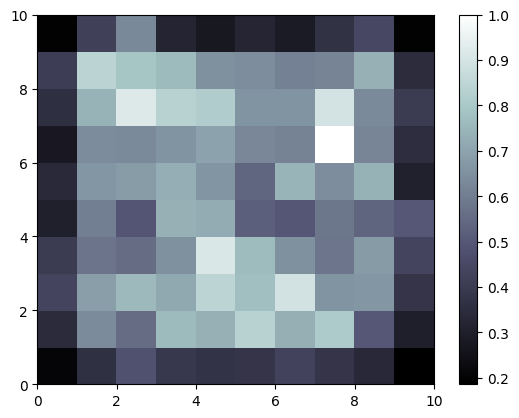

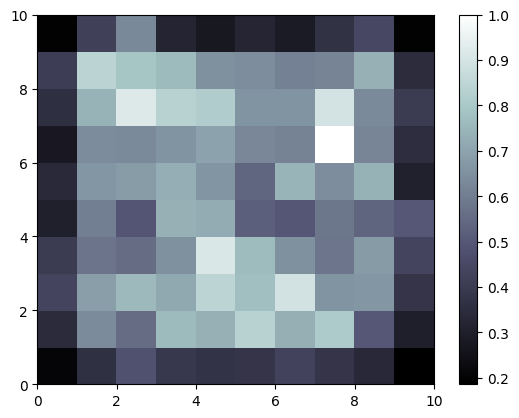

In [16]:
from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)
colorbar()
show()
bone()
pcolor(som.distance_map().T)
colorbar()

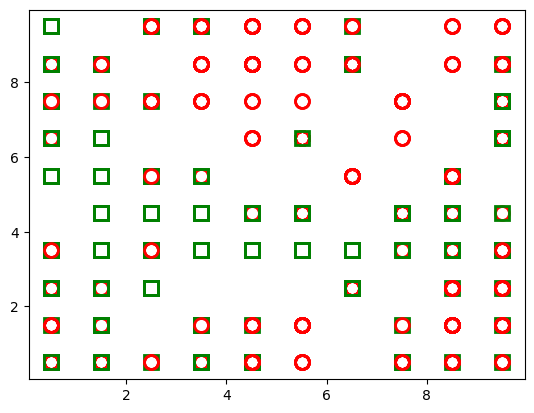

In [17]:
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [19]:
mappings = som.win_map(X)
mappings
mappings.keys()
len(mappings.keys())

mappings[(9,8)]
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)
frauds

array([[0.        , 0.10526316, 0.36910714, 0.5       , 0.92307692,
        0.875     , 0.01175439, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.04      ],
       [0.        , 0.26315789, 0.13392857, 0.5       , 0.92307692,
        0.875     , 0.02192982, 1.        , 1.        , 0.13432836,
        1.        , 0.5       , 0.0905    ],
       [0.        , 0.13654135, 0.08178571, 0.5       , 0.76923077,
        0.875     , 0.08035088, 1.        , 1.        , 0.10447761,
        1.        , 0.5       , 0.07      ],
       [0.        , 0.13909774, 0.41964286, 0.5       , 1.        ,
        0.875     , 0.01754386, 1.        , 1.        , 0.02985075,
        1.        , 0.5       , 0.15      ],
       [0.        , 0.49503759, 0.01642857, 0.5       , 0.92307692,
        0.875     , 0.0145614 , 1.        , 1.        , 0.1641791 ,
        1.        , 0.5       , 0.22      ],
       [0.        , 0.40977444, 0.07285714, 0.        , 0.76923077,
        0.875     , 0.00438

In [20]:
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,20.75,10.335,2.0,13.0,8.0,0.335,1.0,1.0,1.0,1.0,2.0,80.0
1,0.0,31.25,3.750,2.0,13.0,8.0,0.625,1.0,1.0,9.0,1.0,2.0,181.0
2,0.0,22.83,2.290,2.0,11.0,8.0,2.290,1.0,1.0,7.0,1.0,2.0,140.0
3,0.0,23.00,11.750,2.0,14.0,8.0,0.500,1.0,1.0,2.0,1.0,2.0,300.0
4,0.0,46.67,0.460,2.0,13.0,8.0,0.415,1.0,1.0,11.0,1.0,2.0,440.0
5,0.0,41.00,2.040,1.0,11.0,8.0,0.125,1.0,1.0,23.0,1.0,2.0,455.0
6,0.0,53.33,0.165,2.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,1.0,62.0
7,0.0,30.25,5.500,2.0,4.0,4.0,5.500,0.0,0.0,0.0,1.0,1.0,100.0
8,0.0,45.00,4.585,2.0,4.0,8.0,1.000,0.0,0.0,0.0,1.0,1.0,240.0
9,0.0,22.50,0.415,2.0,3.0,4.0,0.335,0.0,0.0,0.0,1.0,1.0,144.0


## Conclusion

In this experiment, we successfully implemented Self-Organizing Maps (SOM) to analyze credit card applications. By employing SOM, we were able to cluster the data effectively and identify potential fraudulent activities.



- **Distance Map Visualization**: The distance map produced by the SOM provided valuable insights into the topology of the data. Areas of low distance indicate clusters of similar applications, while regions of high distance reveal outliers.

- **Fraud Detection**: By mapping the input data to the SOM grid, we effectively visualized the distribution of fraud cases. The identified fraudulent applications were distinctly marked, allowing for quick identification and further investigation.

### Applications of Self-Organizing Maps:
- **Customer Segmentation**: SOM can be used to segment customers based on their spending patterns, enabling targeted marketing strategies.

- **Anomaly Detection**: As demonstrated in this experiment, SOM is effective in detecting anomalies or unusual patterns in financial data, which is critical for fraud detection.

- **Dimensionality Reduction**: SOM helps in reducing high-dimensional data into a lower-dimensional representation while preserving the topological structure, aiding in data visualization and interpretation.

- **Feature Extraction**: It can assist in identifying significant features in datasets, which can be utilized in further predictive modeling.

